In [5]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
import pandas as pd
import numpy as np
import re
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [104]:
data = pd.read_csv('Language Detection.csv')

In [105]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [106]:
Counter(data.Language)

Counter({'English': 1385,
         'Malayalam': 594,
         'Hindi': 63,
         'Tamil': 469,
         'Portugeese': 739,
         'French': 1014,
         'Dutch': 546,
         'Spanish': 819,
         'Greek': 365,
         'Russian': 692,
         'Danish': 428,
         'Italian': 698,
         'Turkish': 474,
         'Sweedish': 676,
         'Arabic': 536,
         'German': 470,
         'Kannada': 369})

In [107]:
lmtzr = WordNetLemmatizer()
list_of_stop_words = []
for stop in ['English', 'French','Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian', 'Turkish', 'German']:
    list_of_stop_words.append(stopwords.words(stop))
stops = [element for sub in list_of_stop_words for element in sub]
punkt = '!"#«»$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def removeSymbolsAndNumbers(text):     
    text = str(text).lower() # lowercase
    text = re.sub(r'[{}]'.format(punkt), '', text)
    text = re.sub(r'\d+', '', text)
#     text = re.sub(r'[«]','',string)
    
    return ' '.join([lmtzr.lemmatize(word,wordnet.VERB) for word in nltk.word_tokenize(text) if word.lower() not in stops])

def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [108]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
X_buffer = data.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)

In [110]:
X = X_buffer.apply(removeSymbolsAndNumbers)
data.Text = X.copy()
y = data['Language']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [15]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [16]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [17]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

In [18]:
print("Accuracy is :",accuracy)

Accuracy is : 0.968568665377176


In [19]:
def predict(text):
    language = model.predict([text])
    print('The Language is in',language[0])

In [20]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

The Language is in English
The Language is in French
The Language is in Arabic
The Language is in Spanish
The Language is in Malayalam
The Language is in Russian
The Language is in Hindi
The Language is in Hindi


In [21]:
filename = 'done_language_model.sav'
joblib.dump(model, filename)

['done_language_model.sav']

In [22]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.968568665377176


In [23]:
loaded_model.predict(['wie gehts'])[0]

'German'

In [24]:
from deep_translator import GoogleTranslator
to_translate = 'مهلا'
predicted_lang = loaded_model.predict([to_translate])[0] 
translated = GoogleTranslator(source= predicted_lang, target='english').translate(to_translate)
# outpout -> Ich möchte diesen Text übersetzen

In [25]:
translated

'Привет'

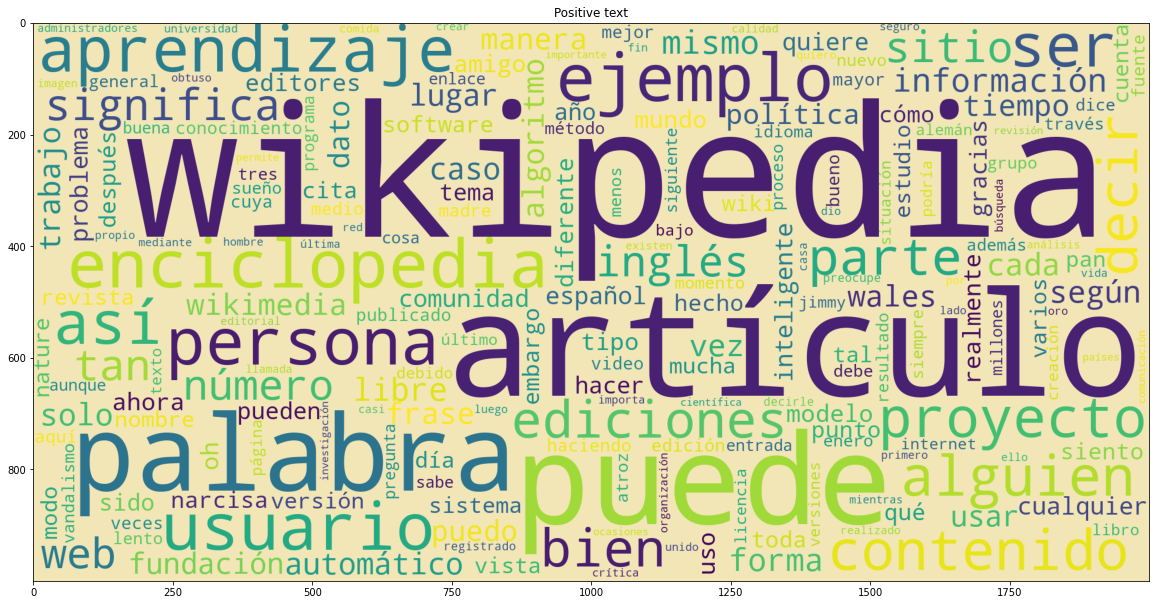

In [91]:
lang = data[data.Language=='Spanish']
lang_text = " ".join([word for word in lang.Text])
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2E6B6',collocations=False).generate(lang_text)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive text")
plt.show()

In [39]:
# Counter(data.Text[data.Language == 'English'])
# list(data.Text[data.Language == 'English'])

In [100]:
bags = Counter(np.concatenate(np.array([str(word).split(' ') for word in data.Text[data.Language == 'Spanish']],dtype=object), axis=0))


In [101]:
word,freq = [],[]
for w,f in bags.most_common():
    word.append(w)
    freq.append(f)

In [102]:
dfm = pd.DataFrame({'word': word, 'freq': freq})

In [103]:
dfm.head(20)

,word,freq
0,​,244
1,wikipedia,183
2,artículos,78
3,puedes,47
4,aprendizaje,40
5,enciclopedia,39
6,ser,37
7,así,36
8,ejemplo,36
9,usuarios,36


In [66]:
[{'label': _, 'value': _} for _ in data.Language.unique()]

[{'label': 'English', 'value': 'English'},
 {'label': 'Malayalam', 'value': 'Malayalam'},
 {'label': 'Hindi', 'value': 'Hindi'},
 {'label': 'Tamil', 'value': 'Tamil'},
 {'label': 'Portugeese', 'value': 'Portugeese'},
 {'label': 'French', 'value': 'French'},
 {'label': 'Dutch', 'value': 'Dutch'},
 {'label': 'Spanish', 'value': 'Spanish'},
 {'label': 'Greek', 'value': 'Greek'},
 {'label': 'Russian', 'value': 'Russian'},
 {'label': 'Danish', 'value': 'Danish'},
 {'label': 'Italian', 'value': 'Italian'},
 {'label': 'Turkish', 'value': 'Turkish'},
 {'label': 'Sweedish', 'value': 'Sweedish'},
 {'label': 'Arabic', 'value': 'Arabic'},
 {'label': 'German', 'value': 'German'},
 {'label': 'Kannada', 'value': 'Kannada'}]

In [111]:
data.to_csv('clean_language.csv',index=False)

In [106]:
data_clean = pd.read_csv('clean_language.csv')

In [119]:
data_clean.Text[data_clean.Language == 'English']

0       nature broadest sense natural physical materia...
1       nature refer phenomena physical world life gen...
2                         study nature large part science
3       although humans part nature human activity oft...
4       word nature borrow old french nature derive la...
                              ...                        
1380           mistake let fee something nice day onwards
1381    narcisa change ways struggle first slowly pati...
1382    hows narcissism marian tell everything happen ...
1383                    guess wouldnt gold bread huh know
1384    terry actually look little like angel though s...
Name: Text, Length: 1385, dtype: object

In [120]:
data.Text[data.Language == 'English']

0       nature broadest sense natural physical materia...
1       nature refer phenomena physical world life gen...
2                         study nature large part science
3       although humans part nature human activity oft...
4       word nature borrow old french nature derive la...
                              ...                        
1380           mistake let fee something nice day onwards
1381    narcisa change ways struggle first slowly pati...
1382    hows narcissism marian tell everything happen ...
1383                    guess wouldnt gold bread huh know
1384    terry actually look little like angel though s...
Name: Text, Length: 1385, dtype: object

In [134]:
[{'id': c, 'name': c} for c in data_clean.columns]

[{'id': 'Text', 'name': 'Text'}, {'id': 'Language', 'name': 'Language'}]

In [140]:
data_clean.Language.unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [ ]:
['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French','Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian','Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada']

In [144]:
list(np.arange(17)+1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]